# Jets.jl
The Jets.jl package is a Chevron linear and nonlinear operator framework that is useful for building operators used in inverse problems, such as FWI. 

Jets operators are organized into operator packs:
* `JetPack.jl` padding and truncation, derivatives and integration, permutations and reshaping, and more esoteric operators including transcendental functions  
* `JetPackDSP.jl` digital signal processing including convolution, filtering, and envelopes of signals
* `JetPackTransforms.jl` slant stack, wavelet, cosine, and Fourier transforms of signals
* `JetPackWaveFD.jl`  seismic modeling operators and Jacobians for use in full waveform inversion 

# Add packages used in this group of notebooks 

In [1]:
]add Jets JetPack JetPackTransforms PyPlot Random JetPackDSP LinearAlgebra

   Updating registry at `~/.julia/registries/ChevronETC`
   Updating git-repo `https://chevron@dev.azure.com/chevron/ETC-ESD-PkgRegistry.jl/_git/PkgRegistry.jl`


   Updating registry at `~/.julia/registries/General`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [2]:
using Jets, JetPack, JetPackTransforms, PyPlot, Random, JetPackDSP, LinearAlgebra

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278
┌ Warning: Module Conda with build ID 1204325240618003 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1017
┌ Warning: Module Conda with build ID 1204325240618003 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1017
┌ Info: Skipping precompilation since __precompile__(false). Importing PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee].
└ @ Base loading.jl:1034
┌ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1278
┌ Warning: Module Conda with build ID 1204325240618003 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a

# JetSpace

JetSpace is an n-dimensional vector space with additional meta-data.  The additional data is:
* a size (n1,n2,...,np) where prod(n1,n2,...np) = n
* a element type such as Float32, Float64, ComplexF64, etc.

### Example 1: 10 dimensions, single precision:

In [3]:
R₁ = JetSpace(Float32,10)

JetSpace{Float32,1}((10,))

### Example 2: 200 dimensions, double precision, 10x20 array size

In [4]:
R₂ = JetSpace(Float64,10,20)

JetSpace{Float64,2}((10, 20))

### Example 3: 400 dimensions, double precision complex, 10x20x2 array size

In [5]:
R₃ = JetSpace(ComplexF64,10,20,2)

JetSpace{Complex{Float64},3}((10, 20, 2))

### Convenience methods
Given a space, we can use various convenience methods to inspect and use the space.

In [6]:
eltype(R₂)

Float64

In [7]:
ndims(R₂)

2

In [8]:
length(R₂)

200

In [9]:
size(R₂)

(10, 20)

In [10]:
reshape(ones(200), R₂)

10×20 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [11]:
ones(R₂)

10×20 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [12]:
zeros(R₂)

10×20 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [13]:
rand(R₂)

10×20 Array{Float64,2}:
 0.246471  0.0388042  0.949242  0.008224  …  0.948404    0.426609   0.927753
 0.540122  0.478906   0.236278  0.589116     0.820522    0.545503   0.399841
 0.637337  0.772162   0.479948  0.357052     0.981634    0.818503   0.856697
 0.424604  0.530184   0.905445  0.977068     0.361848    0.156197   0.0769073
 0.114238  0.748446   0.264989  0.65475      0.708371    0.82256    0.0847557
 0.059154  0.954943   0.773458  0.130552  …  0.970224    0.604244   0.987903
 0.807053  0.608018   0.812661  0.890959     0.925246    0.895576   0.9506
 0.405675  0.835694   0.215511  0.38599      0.00650651  0.512484   0.736434
 0.854289  0.208758   0.313439  0.164211     0.870019    0.0716175  0.081837
 0.173097  0.525119   0.372738  0.358784     0.78916     0.0840409  0.39968

In [14]:
Array(R₂)
# note the values in this returned array are undefined

10×20 Array{Float64,2}:
 2.0e-323     6.9414e-310  6.4e-323     …  7.4e-322     6.9414e-310
 2.0e-323     6.9414e-310  7.0e-323        7.4e-322     6.9414e-310
 6.9414e-310  4.0e-323     6.9414e-310     6.9414e-310  7.56e-322
 6.9414e-310  5.4e-323     6.9414e-310     6.9414e-310  7.56e-322
 2.5e-323     6.9414e-310  7.4e-323        7.46e-322    6.9414e-310
 2.5e-323     6.9414e-310  7.4e-323     …  7.46e-322    6.9414e-310
 6.9414e-310  6.0e-323     6.9414e-310     6.9414e-310  7.6e-322
 6.9414e-310  6.0e-323     6.9414e-310     6.9414e-310  7.6e-322
 3.0e-323     6.9414e-310  8.0e-323        7.5e-322     6.9414e-310
 3.5e-323     6.9414e-310  9.0e-323        7.5e-322     6.9414e-310

# Jet operators

A Jet operator is a linear or nonlinear mapping between two spaces. In the case of a nonlinear operator, a jet also defines the linearization or Jacobian of the nonlinear mapping.

* A Jet operator encapsulates a Jet
* A Jet is loosely based on the mathematical name-sake, and includes the mapping and linearization

### See also
https://en.wikipedia.org/wiki/Jet_(mathematics)

### Example 1: Linear operator

In [15]:
A = JopDiagonal(rand(2))

"Jet linear operator, (2,) → (2,)"

In [16]:
state(A)

(diagonal = [0.3105297936417639, 0.044705879143520644],)

In [17]:
B = convert(Array,A)

2×2 Array{Float64,2}:
 0.31053  0.0
 0.0      0.0447059

In [18]:
# create a random vector in the domain of operator A
m = rand(domain(A))

2-element Array{Float64,1}:
 0.829294001045906
 0.8439990758857987

In [19]:
# apply the forward lineare map of operator A to domain vector m, returning range vector d
d = A*m

2-element Array{Float64,1}:
 0.25752049501313795
 0.03773172068379362

In [20]:
# inplace version that stores A*m in the supplied range vector d
mul!(d,A,m)

2-element Array{Float64,1}:
 0.25752049501313795
 0.03773172068379362

In [21]:
# apply the adjoint lineare map of operator A to range vector d, returning domain vector a
a = A'*d

2-element Array{Float64,1}:
 0.07996778617495462
 0.0016868297447667558

In [22]:
# inplace version that stores A'*d in the supplied domain vector a
mul!(a,A',d)

2-element Array{Float64,1}:
 0.07996778617495462
 0.0016868297447667558

### Example 2: Nonlinear operator

In [49]:
F = JopEnvelope(JetSpace(Float64,64))

"Jet nonlinear operator, (64,) → (64,)"

In [50]:
# a random domain vector with values in [-1,+1]
m = -1 .+ 2*rand(domain(F))

64-element Array{Float64,1}:
 -0.2682282195122929
 -0.6098194736747562
  0.8888940075690459
  0.043367072486357294
 -0.07992508704654133
  0.6794545139772783
  0.06607553607830052
  0.02487176184923534
 -0.2389631194911086
  0.30741757184559626
  0.09830902690386356
 -0.022703114444271755
  0.6500274945994073
  ⋮
  0.09181202566287405
  0.872711275108542
 -0.24524874164010235
 -0.7992136426453627
  0.9033376065838512
  0.05878460175881761
  0.1440686628912511
  0.9006844636890814
 -0.21187735028236476
 -0.2521631722134736
  0.9847334785946393
 -0.698418959100553

In [51]:
# Apply the nonlinear envelope operator to the domain vector m and return the result in the range vector d
d = F*m

64-element Array{Float64,1}:
 0.2731579171371814
 0.771259946742657
 1.0890976624985156
 0.7090336789969065
 0.5736472289555834
 0.7044201263905634
 0.3215405345572325
 0.2894847424311486
 0.24154754659324598
 0.34679451691591956
 0.3530255395335248
 0.18567634023877289
 0.7199642957502644
 ⋮
 0.5907829778893825
 0.8727218549744036
 1.1030017637623286
 1.1141129581512816
 0.9773236900593559
 0.3756939179924954
 0.3958111396818957
 0.9175532639649556
 0.9816767177534862
 0.7088145818219496
 1.1450320902526654
 0.9684755395659966

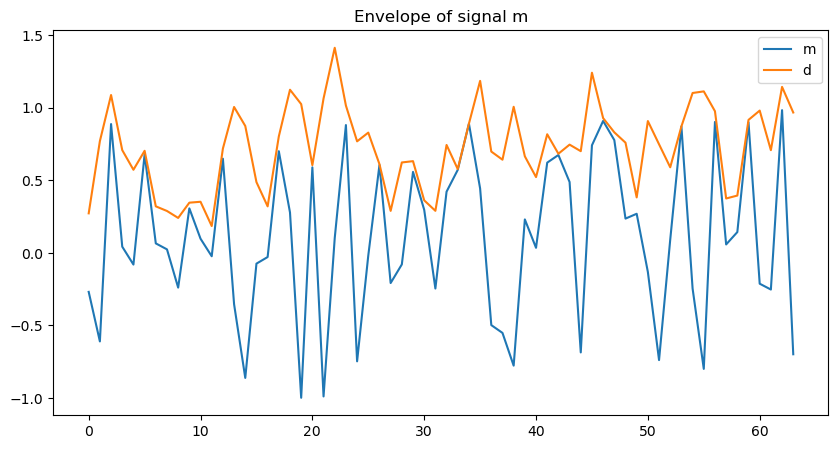

PyObject Text(0.5, 1.0, 'Envelope of signal m')

In [52]:
figure(figsize=(10,5))
plot(m, label="m")
plot(d, label="d")
legend()
title("Envelope of signal m")

In [27]:
# compute the jacobian of F, copying the underlying jet
J = jacobian(F, m) 

# compute the jacobian of F, sharing the underlying jet
J = jacobian!(F, m)

"Jet linear operator, (64,) → (64,)"

## Jet compositions

To compose operators, we use the symbol: $\circ$.  This can be typed using unicode which is fully supported in Julia.  In Jupyter (and most text editors with a Julia syntax plugin) you can use LaTeX syntax `\circ` to produce $\circ$.

In [28]:
A₁ = JopDiagonal(rand(2))
A₂ = JopDiagonal(rand(2))
A₃ = rand(2,2)

A = A₃ ∘ A₂ ∘ A₁

"Jet linear operator, (2,) → (2,)"

In [29]:
# test the composition behaves as expected
m = rand(domain(A))
A*m ≈ A₃ * (A₂ * (A₁ * m))

true

## Jet linear combinations
Compositions of linear operators do not require the `\circ` symbol

In [30]:
A = 2.0*A₁ - 3.0*A₂ + 4.0*A₃
A*m ≈ 2.0*(A₁*m) - 3.0*(A₂*m) + 4.0*(A₃*m)

true

## Jet nonlinear combinations
You may compose arbitrary combinations of linear and nonlinear operators, provided domains and ranges match up

In [31]:
A₁ = JopDiagonal(rand(Float64,10))
A₂ = JopDiagonal(rand(Float64,10))
E = JopEnvelope(JetSpace(Float64,10))

op = 2.0*A₁∘E∘A₂
m = rand(domain(op))
d = op*m

10-element Array{Float64,1}:
 0.030112389942396813
 0.002820532904246159
 0.18110008364258368
 0.42015431428138755
 0.25056241073157887
 0.7609503686411763
 0.6138847373652405
 0.06892636585313276
 0.04140147168565356
 0.15785356788551327

# Jet block operators
We use block operators extensively, particular in the context of full waveform inversion where each source is assigned to a block. 

In [32]:
A = @blockop [JopDiagonal(rand(2)) JopDiagonal(rand(2))]

"Jet linear operator, (4,) → (2,)"

In [33]:
m = rand(domain(A))

4-element Jets.BlockArray{Float64,Array{Float64,1}}:
 0.45045332308847796
 0.13701784367820902
 0.40373053934847314
 0.02523758261505815

In [34]:
d = A*m

2-element Jets.BlockArray{Float64,Array{Float64,1}}:
 0.6690314026676643
 0.1323468262417468

We use array comprehensions extensively in connection with the block operator

In [35]:
A = @blockop [JopDiagonal(rand(2)) for irow=1:2, icol=1:3]

"Jet linear operator, (6,) → (4,)"

In [36]:
nblocks(A)

(2, 3)

In [37]:
nblocks(A,1)

2

In [38]:
nblocks(A,2)

3

In [39]:
getblock(A,1,1)

"Jet linear operator, (2,) → (2,)"